In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/content/annotations.csv")
df

,filename,juliandate,loc,low_freq,high_freq,start,end,species
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,2.459626e+06,Tautenburg,6589,9171,10,10.9,b.
1,2459626.320473_Tautenburg___1591-5722kHz___10-...,2.459626e+06,Tautenburg,1591,5722,10,25.8,ch
2,2459626.327428_Tautenburg___1652-4606kHz___10-...,2.459626e+06,Tautenburg,1652,4606,10,11.4,ch
3,2459626.341944_Tautenburg___1074-5122kHz___10-...,2.459626e+06,Tautenburg,1074,5122,10,19.0,ch
4,2459626.344165_Tautenburg___868-5639kHz___10-2...,2.459626e+06,Tautenburg,868,5639,10,25.9,ch
...,...,...,...,...,...,...,...,...
4133,2460538.613310_Tautenburg___1108-7752kHz___10-...,2.460539e+06,Tautenburg,1108,7752,10,36.3,to
4134,2460539.314342_Tautenburg___1007-5618kHz___10-...,2.460539e+06,Tautenburg,1007,5618,10,156.3,to
4135,2460540.577735_Tautenburg___3282-9383kHz___10-...,2.460541e+06,Tautenburg,3282,9383,10,11.9,tp
4136,2460541.642188_Tautenburg___3946-7208kHz___10-...,2.460542e+06,Tautenburg,3946,7208,10,11.1,tp


# Basic Analysis

In [5]:
df1 = df.copy()
df1

,filename,juliandate,loc,low_freq,high_freq,start,end,species
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,2.459626e+06,Tautenburg,6589,9171,10,10.9,b.
1,2459626.320473_Tautenburg___1591-5722kHz___10-...,2.459626e+06,Tautenburg,1591,5722,10,25.8,ch
2,2459626.327428_Tautenburg___1652-4606kHz___10-...,2.459626e+06,Tautenburg,1652,4606,10,11.4,ch
3,2459626.341944_Tautenburg___1074-5122kHz___10-...,2.459626e+06,Tautenburg,1074,5122,10,19.0,ch
4,2459626.344165_Tautenburg___868-5639kHz___10-2...,2.459626e+06,Tautenburg,868,5639,10,25.9,ch
...,...,...,...,...,...,...,...,...
4133,2460538.613310_Tautenburg___1108-7752kHz___10-...,2.460539e+06,Tautenburg,1108,7752,10,36.3,to
4134,2460539.314342_Tautenburg___1007-5618kHz___10-...,2.460539e+06,Tautenburg,1007,5618,10,156.3,to
4135,2460540.577735_Tautenburg___3282-9383kHz___10-...,2.460541e+06,Tautenburg,3282,9383,10,11.9,tp
4136,2460541.642188_Tautenburg___3946-7208kHz___10-...,2.460542e+06,Tautenburg,3946,7208,10,11.1,tp


In [6]:
df1.shape

(4138, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138 entries, 0 to 4137
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    4138 non-null   object 
 1   juliandate  4138 non-null   float64
 2   loc         4138 non-null   object 
 3   low_freq    4138 non-null   int64  
 4   high_freq   4138 non-null   int64  
 5   start       4138 non-null   int64  
 6   end         4138 non-null   float64
 7   species     4138 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 258.8+ KB


In [8]:
df1.isnull().sum()

,0
filename,0
juliandate,0
loc,0
low_freq,0
high_freq,0
start,0
end,0
species,0


In [9]:
df1.describe()

,juliandate,low_freq,high_freq,start,end
count,4.138000e+03,4138.000000,4138.000000,4138.0,4138.000000
mean,2.460056e+06,5254.476559,8964.553166,10.0,16.881658
std,2.139820e+02,1861.268414,1726.354892,0.0,25.923075
min,2.459626e+06,0.000000,898.000000,10.0,10.000000
25%,2.459863e+06,5361.000000,8557.000000,10.0,11.100000
50%,2.460047e+06,5859.000000,9282.000000,10.0,11.400000
75%,2.460241e+06,6282.000000,10027.000000,10.0,12.000000
max,2.460544e+06,7752.000000,11859.000000,10.0,457.700000


In [10]:
def julian_to_gregorian(julian_date):
    return pd.to_datetime(julian_date, origin='julian', unit='D')

A = df['juliandate'].apply(julian_to_gregorian)
df1['year'] = A.dt.year
df1['month'] = A.dt.month
df1['day'] = A.dt.day
df1['time'] = A.dt.time

print(df1)

                                               filename    juliandate  \
0     2459626.192622_Tautenburg___6589-9171kHz___10-...  2.459626e+06   
1     2459626.320473_Tautenburg___1591-5722kHz___10-...  2.459626e+06   
2     2459626.327428_Tautenburg___1652-4606kHz___10-...  2.459626e+06   
3     2459626.341944_Tautenburg___1074-5122kHz___10-...  2.459626e+06   
4     2459626.344165_Tautenburg___868-5639kHz___10-2...  2.459626e+06   
...                                                 ...           ...   
4133  2460538.613310_Tautenburg___1108-7752kHz___10-...  2.460539e+06   
4134  2460539.314342_Tautenburg___1007-5618kHz___10-...  2.460539e+06   
4135  2460540.577735_Tautenburg___3282-9383kHz___10-...  2.460541e+06   
4136  2460541.642188_Tautenburg___3946-7208kHz___10-...  2.460542e+06   
4137  2460543.653468_Tautenburg___5215-9665kHz___10-...  2.460544e+06   

             loc  low_freq  high_freq  start    end species  year  month  day  \
0     Tautenburg      6589       9171     

In [11]:
df1

,filename,juliandate,loc,low_freq,high_freq,start,end,species,year,month,day,time
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,2.459626e+06,Tautenburg,6589,9171,10,10.9,b.,2022,2,15,16:37:22.540790
1,2459626.320473_Tautenburg___1591-5722kHz___10-...,2.459626e+06,Tautenburg,1591,5722,10,25.8,ch,2022,2,15,19:41:28.867194
2,2459626.327428_Tautenburg___1652-4606kHz___10-...,2.459626e+06,Tautenburg,1652,4606,10,11.4,ch,2022,2,15,19:51:29.779204
3,2459626.341944_Tautenburg___1074-5122kHz___10-...,2.459626e+06,Tautenburg,1074,5122,10,19.0,ch,2022,2,15,20:12:23.961618
4,2459626.344165_Tautenburg___868-5639kHz___10-2...,2.459626e+06,Tautenburg,868,5639,10,25.9,ch,2022,2,15,20:15:35.856011
...,...,...,...,...,...,...,...,...,...,...,...,...
4133,2460538.613310_Tautenburg___1108-7752kHz___10-...,2.460539e+06,Tautenburg,1108,7752,10,36.3,to,2024,8,16,02:43:09.983993
4134,2460539.314342_Tautenburg___1007-5618kHz___10-...,2.460539e+06,Tautenburg,1007,5618,10,156.3,to,2024,8,16,19:32:39.148804
4135,2460540.577735_Tautenburg___3282-9383kHz___10-...,2.460541e+06,Tautenburg,3282,9383,10,11.9,tp,2024,8,18,01:51:56.303984
4136,2460541.642188_Tautenburg___3946-7208kHz___10-...,2.460542e+06,Tautenburg,3946,7208,10,11.1,tp,2024,8,19,03:24:45.043202


In [12]:
df1.drop(columns = "juliandate", inplace = True)

In [13]:
df["species"].value_counts()

,count
species,
st,2003
re,1191
b.,322
to,190
co,67
h.,67
s.,60
r.,47
mh,33


In [15]:
df["species"].nunique()

40

In [17]:
df1["month"].unique()

array([ 2,  3,  4,  5,  8,  9, 10, 11], dtype=int32)

In [18]:
df1["year"].unique()

array([2022, 2023, 2024], dtype=int32)

In [19]:
def time_to_part_of_day(t):
    if t >= pd.to_datetime('05:00:00').time() and t < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif t >= pd.to_datetime('12:00:00').time() and t < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif t >= pd.to_datetime('17:00:00').time() and t < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

df1['part_of_day'] = df1['time'].apply(time_to_part_of_day)

print(df1)

                                               filename         loc  low_freq  \
0     2459626.192622_Tautenburg___6589-9171kHz___10-...  Tautenburg      6589   
1     2459626.320473_Tautenburg___1591-5722kHz___10-...  Tautenburg      1591   
2     2459626.327428_Tautenburg___1652-4606kHz___10-...  Tautenburg      1652   
3     2459626.341944_Tautenburg___1074-5122kHz___10-...  Tautenburg      1074   
4     2459626.344165_Tautenburg___868-5639kHz___10-2...  Tautenburg       868   
...                                                 ...         ...       ...   
4133  2460538.613310_Tautenburg___1108-7752kHz___10-...  Tautenburg      1108   
4134  2460539.314342_Tautenburg___1007-5618kHz___10-...  Tautenburg      1007   
4135  2460540.577735_Tautenburg___3282-9383kHz___10-...  Tautenburg      3282   
4136  2460541.642188_Tautenburg___3946-7208kHz___10-...  Tautenburg      3946   
4137  2460543.653468_Tautenburg___5215-9665kHz___10-...  Tautenburg      5215   

      high_freq  start    e

In [20]:
df1

,filename,loc,low_freq,high_freq,start,end,species,year,month,day,time,part_of_day
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,Tautenburg,6589,9171,10,10.9,b.,2022,2,15,16:37:22.540790,Afternoon
1,2459626.320473_Tautenburg___1591-5722kHz___10-...,Tautenburg,1591,5722,10,25.8,ch,2022,2,15,19:41:28.867194,Evening
2,2459626.327428_Tautenburg___1652-4606kHz___10-...,Tautenburg,1652,4606,10,11.4,ch,2022,2,15,19:51:29.779204,Evening
3,2459626.341944_Tautenburg___1074-5122kHz___10-...,Tautenburg,1074,5122,10,19.0,ch,2022,2,15,20:12:23.961618,Evening
4,2459626.344165_Tautenburg___868-5639kHz___10-2...,Tautenburg,868,5639,10,25.9,ch,2022,2,15,20:15:35.856011,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
4133,2460538.613310_Tautenburg___1108-7752kHz___10-...,Tautenburg,1108,7752,10,36.3,to,2024,8,16,02:43:09.983993,Night
4134,2460539.314342_Tautenburg___1007-5618kHz___10-...,Tautenburg,1007,5618,10,156.3,to,2024,8,16,19:32:39.148804,Evening
4135,2460540.577735_Tautenburg___3282-9383kHz___10-...,Tautenburg,3282,9383,10,11.9,tp,2024,8,18,01:51:56.303984,Night
4136,2460541.642188_Tautenburg___3946-7208kHz___10-...,Tautenburg,3946,7208,10,11.1,tp,2024,8,19,03:24:45.043202,Night


In [21]:

df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S.%f')

df1['hour'] = df1['time'].dt.hour

print(df1)

                                               filename         loc  low_freq  \
0     2459626.192622_Tautenburg___6589-9171kHz___10-...  Tautenburg      6589   
1     2459626.320473_Tautenburg___1591-5722kHz___10-...  Tautenburg      1591   
2     2459626.327428_Tautenburg___1652-4606kHz___10-...  Tautenburg      1652   
3     2459626.341944_Tautenburg___1074-5122kHz___10-...  Tautenburg      1074   
4     2459626.344165_Tautenburg___868-5639kHz___10-2...  Tautenburg       868   
...                                                 ...         ...       ...   
4133  2460538.613310_Tautenburg___1108-7752kHz___10-...  Tautenburg      1108   
4134  2460539.314342_Tautenburg___1007-5618kHz___10-...  Tautenburg      1007   
4135  2460540.577735_Tautenburg___3282-9383kHz___10-...  Tautenburg      3282   
4136  2460541.642188_Tautenburg___3946-7208kHz___10-...  Tautenburg      3946   
4137  2460543.653468_Tautenburg___5215-9665kHz___10-...  Tautenburg      5215   

      high_freq  start    e

In [22]:
df1["part_of_day"].value_counts()

,count
part_of_day,
Night,2799
Evening,700
Morning,408
Afternoon,231


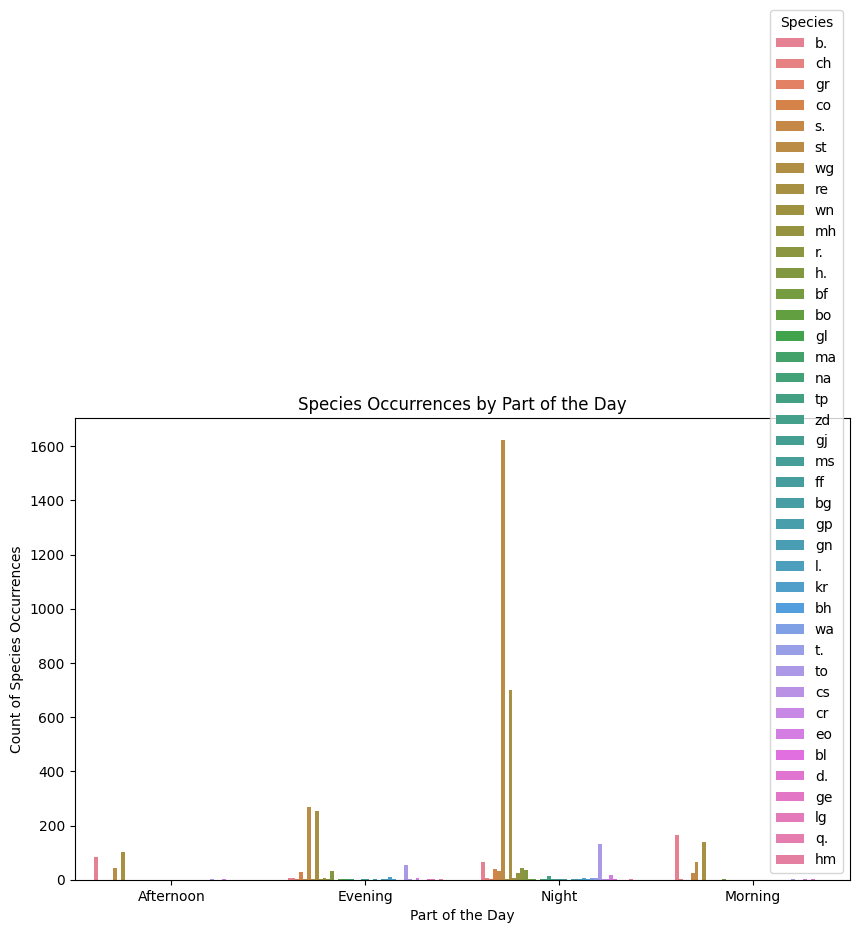

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='part_of_day', hue='species')
plt.title('Species Occurrences by Part of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Count of Species Occurrences')
plt.legend(title='Species')
plt.show()

In [24]:
# Count occurrences of species per part of the day
species_count = df1.groupby(['part_of_day', 'species']).size().reset_index(name='counts')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=species_count, x='hour', y='counts', hue='species', palette='deep')

plt.title('Species Detection by Part of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Number of Detections')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `hour` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [25]:
species_count = df1.groupby(['part_of_day', 'species']).size().reset_index(name='counts')


In [26]:
species_count = df1.groupby(['part_of_day', 'species']).size().reset_index(name = "counts")


In [27]:
night_data = species_count[species_count['part_of_day'] == "Night"]
night_data

,part_of_day,species,counts
43,Night,b.,66
44,Night,bf,4
45,Night,bh,3
46,Night,bl,1
47,Night,bo,1
48,Night,ch,5
49,Night,co,39
50,Night,cr,1
51,Night,cs,2
52,Night,eo,19


In [25]:
night_data.nunique()

,0
part_of_day,1
species,34
counts,18


<ipython-input-30-b3c73c485a67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_night_data, x='species', y='counts', palette='deep')


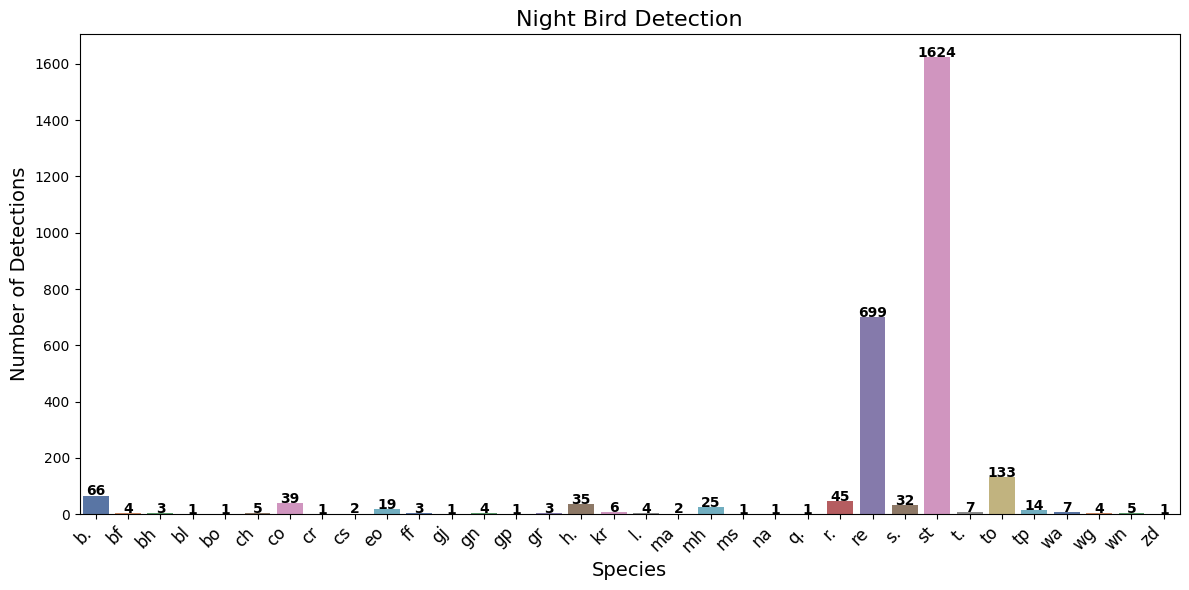

In [30]:
merged_night_data = night_data.groupby('species', as_index=False).agg({'counts': 'sum'})

# Create a bar plot for unique species detected at night
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_night_data, x='species', y='counts', palette='deep')

# Add the counts on top of each bar
for index, row in merged_night_data.iterrows():
    plt.text(index, row['counts'] + 0.3, row['counts'], color='black', ha="center", fontweight='bold')

# Add title and labels
plt.title('Night Bird Detection', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Number of Detections', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
print("Night Bird Detection Data:")
print(merged_night_data)


Night Bird Detection Data:
   species  counts
0       b.      66
1       bf       4
2       bh       3
3       bl       1
4       bo       1
5       ch       5
6       co      39
7       cr       1
8       cs       2
9       eo      19
10      ff       3
11      gj       1
12      gn       4
13      gp       1
14      gr       3
15      h.      35
16      kr       6
17      l.       4
18      ma       2
19      mh      25
20      ms       1
21      na       1
22      q.       1
23      r.      45
24      re     699
25      s.      32
26      st    1624
27      t.       7
28      to     133
29      tp      14
30      wa       7
31      wg       4
32      wn       5
33      zd       1


In [28]:
species_counts = df1["species"].value_counts()

species_counts_df = species_counts.reset_index()
species_counts_df.columns = ['species', 'counts']

sorted_species_counts_df = species_counts_df.sort_values(by='species')

print("Species Counts Sorted Alphabetically:")
print(sorted_species_counts_df)

Species Counts Sorted Alphabetically:
   species  counts
2       b.     322
21      bf       5
31      bg       1
22      bh       4
35      bl       1
28      bo       3
11      ch      14
4       co      67
33      cr       1
25      cs       3
24      d.       4
9       eo      26
27      ff       3
36      ge       1
18      gj       5
34      gl       1
17      gn       5
30      gp       1
23      gr       4
5       h.      67
39      hm       1
10      kr      16
19      l.       5
37      lg       1
20      ma       5
8       mh      33
26      ms       3
29      na       2
38      q.       1
7       r.      47
1       re    1191
6       s.      60
0       st    2003
15      t.       7
3       to     190
12      tp      14
14      wa       7
13      wg       7
16      wn       6
32      zd       1


In [31]:
merged_night_data = merged_night_data.merge(
    sorted_species_counts_df[['species', 'counts']],
    on='species',
    how='left',
    suffixes=('', '_during_whole_day')
)

# Rename the new counts column for clarity
merged_night_data.rename(columns={'counts_during_whole_day': 'counts_during_whole_day'}, inplace=True)

# Display the updated merged DataFrame
print("Updated Night Bird Detection  Data with Counts During Whole Day:")
print(merged_night_data)

Updated Night Bird Detection  Data with Counts During Whole Day:
   species  counts  counts_during_whole_day
0       b.      66                      322
1       bf       4                        5
2       bh       3                        4
3       bl       1                        1
4       bo       1                        3
5       ch       5                       14
6       co      39                       67
7       cr       1                        1
8       cs       2                        3
9       eo      19                       26
10      ff       3                        3
11      gj       1                        5
12      gn       4                        5
13      gp       1                        1
14      gr       3                        4
15      h.      35                       67
16      kr       6                       16
17      l.       4                        5
18      ma       2                        5
19      mh      25                       33
20      ms 

In [32]:
df2 = pd.read_excel('/content/Species.xlsx', engine='openpyxl')
df2.columns

Index(['Species Code', 'Species Name English', 'Species Name Deutsch'], dtype='object')

In [33]:
# Set index for both DataFrames
df1.set_index('species', inplace=True)
df2.set_index('Species Code', inplace=True)

# Use the .join() method to join the DataFrames
df1 = df1.join(df2, how='left')

# Reset the index to bring species back to a column
df1.reset_index(inplace=True)

# Display the updated DataFrame
print(df1)


     species                                           filename         loc  \
0         b.  2459626.192622_Tautenburg___6589-9171kHz___10-...  Tautenburg   
1         b.  2459627.200193_Tautenburg___5660-8965kHz___10-...  Tautenburg   
2         b.  2459627.201466_Tautenburg___5907-8964kHz___10-...  Tautenburg   
3         b.  2459627.746915_Tautenburg___5763-9192kHz___10-...  Tautenburg   
4         b.  2459627.747022_Tautenburg___6134-8798kHz___10-...  Tautenburg   
...      ...                                                ...         ...   
4133      wn  2460009.507276_Tautenburg___846-3745kHz___10-1...  Tautenburg   
4134      wn  2460028.355035_Tautenburg___402-4530kHz___10-1...  Tautenburg   
4135      wn  2460029.585977_Tautenburg___524-5759kHz___10-2...  Tautenburg   
4136      wn  2460031.483458_Tautenburg___1148-4470kHz___10-...  Tautenburg   
4137      zd  2459843.431308_Tautenburg___523-4973kHz___10-1...  Tautenburg   

      low_freq  high_freq  start   end  year  month

In [36]:
df['time'] = pd.to_datetime(df['time'])

# Extract only the time part (hours, minutes, seconds)
df['time'] = df['datetime'].dt.strftime('%H:%M:%S')

# Display the updated DataFrame
print(df)

KeyError: 'time'

In [37]:
df1

,species,filename,loc,low_freq,high_freq,start,end,year,month,day,time,part_of_day,hour,Species Name English,Species Name Deutsch
0,b.,2459626.192622_Tautenburg___6589-9171kHz___10-...,Tautenburg,6589,9171,10,10.9,2022,2,15,1900-01-01 16:37:22.540790,Afternoon,16,"'Blackbird',",'Amsel'
1,b.,2459627.200193_Tautenburg___5660-8965kHz___10-...,Tautenburg,5660,8965,10,11.3,2022,2,16,1900-01-01 16:48:16.675202,Afternoon,16,"'Blackbird',",'Amsel'
2,b.,2459627.201466_Tautenburg___5907-8964kHz___10-...,Tautenburg,5907,8964,10,11.0,2022,2,16,1900-01-01 16:50:06.662414,Afternoon,16,"'Blackbird',",'Amsel'
3,b.,2459627.746915_Tautenburg___5763-9192kHz___10-...,Tautenburg,5763,9192,10,11.0,2022,2,17,1900-01-01 05:55:33.456002,Morning,5,"'Blackbird',",'Amsel'
4,b.,2459627.747022_Tautenburg___6134-8798kHz___10-...,Tautenburg,6134,8798,10,11.0,2022,2,17,1900-01-01 05:55:42.700812,Morning,5,"'Blackbird',",'Amsel'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,wn,2460009.507276_Tautenburg___846-3745kHz___10-1...,Tautenburg,846,3745,10,15.9,2023,3,6,1900-01-01 00:10:28.646398,Night,0,"'Wigeon',",'Pfeifente'
4134,wn,2460028.355035_Tautenburg___402-4530kHz___10-1...,Tautenburg,402,4530,10,18.3,2023,3,24,1900-01-01 20:31:15.024001,Evening,20,"'Wigeon',",'Pfeifente'
4135,wn,2460029.585977_Tautenburg___524-5759kHz___10-2...,Tautenburg,524,5759,10,27.9,2023,3,26,1900-01-01 02:03:48.412815,Night,2,"'Wigeon',",'Pfeifente'
4136,wn,2460031.483458_Tautenburg___1148-4470kHz___10-...,Tautenburg,1148,4470,10,22.3,2023,3,27,1900-01-01 23:36:10.771180,Night,23,"'Wigeon',",'Pfeifente'


In [35]:
df1["species"]

,species
0,b.
1,b.
2,b.
3,b.
4,b.
...,...
4133,wn
4134,wn
4135,wn
4136,wn


In [39]:
new_column_order = [
    'filename', 'species','Species Name English', 'Species Name Deutsch', 'loc',
    'low_freq', 'high_freq', 'start', 'end', 'year', 'month', 'day', 'hour', 'part_of_day', 'time',
]

df1 = df1[new_column_order]

df1

,filename,species,Species Name English,Species Name Deutsch,loc,low_freq,high_freq,start,end,year,month,day,hour,part_of_day,time
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,6589,9171,10,10.9,2022,2,15,16,Afternoon,1900-01-01 16:37:22.540790
1,2459627.200193_Tautenburg___5660-8965kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5660,8965,10,11.3,2022,2,16,16,Afternoon,1900-01-01 16:48:16.675202
2,2459627.201466_Tautenburg___5907-8964kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5907,8964,10,11.0,2022,2,16,16,Afternoon,1900-01-01 16:50:06.662414
3,2459627.746915_Tautenburg___5763-9192kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5763,9192,10,11.0,2022,2,17,5,Morning,1900-01-01 05:55:33.456002
4,2459627.747022_Tautenburg___6134-8798kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,6134,8798,10,11.0,2022,2,17,5,Morning,1900-01-01 05:55:42.700812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,2460009.507276_Tautenburg___846-3745kHz___10-1...,wn,"'Wigeon',",'Pfeifente',Tautenburg,846,3745,10,15.9,2023,3,6,0,Night,1900-01-01 00:10:28.646398
4134,2460028.355035_Tautenburg___402-4530kHz___10-1...,wn,"'Wigeon',",'Pfeifente',Tautenburg,402,4530,10,18.3,2023,3,24,20,Evening,1900-01-01 20:31:15.024001
4135,2460029.585977_Tautenburg___524-5759kHz___10-2...,wn,"'Wigeon',",'Pfeifente',Tautenburg,524,5759,10,27.9,2023,3,26,2,Night,1900-01-01 02:03:48.412815
4136,2460031.483458_Tautenburg___1148-4470kHz___10-...,wn,"'Wigeon',",'Pfeifente',Tautenburg,1148,4470,10,22.3,2023,3,27,23,Night,1900-01-01 23:36:10.771180


from matplotlib import pyplot as plt
df1['low_freq'].plot(kind='hist', bins=20, title='low_freq')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['high_freq'].plot(kind='hist', bins=20, title='high_freq')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['end'].plot(kind='hist', bins=20, title='end')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('part_of_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='low_freq', y='high_freq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='high_freq', y='end', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='end', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='year', y='month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['low_freq']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('part_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='part_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('low_freq')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['high_freq']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('part_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='part_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('high_freq')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['end']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('part_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='part_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('end')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('part_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='part_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('month')

from matplotlib import pyplot as plt
df1['low_freq'].plot(kind='line', figsize=(8, 4), title='low_freq')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['high_freq'].plot(kind='line', figsize=(8, 4), title='high_freq')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['end'].plot(kind='line', figsize=(8, 4), title='end')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df1['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='low_freq', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='high_freq', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='end', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='year', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='end', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-45-07a7fe442941>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df1, x='year', y='part_of_day', inner='box', palette='Dark2')


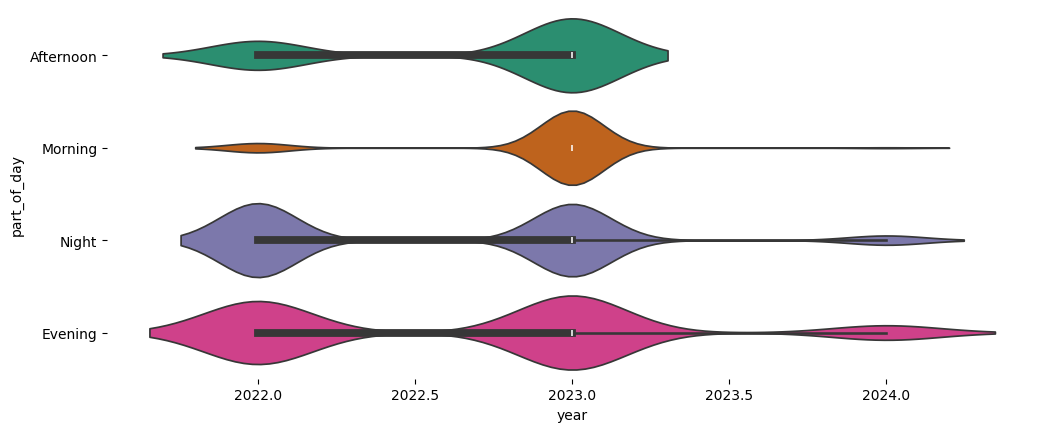

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['part_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='year', y='part_of_day', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

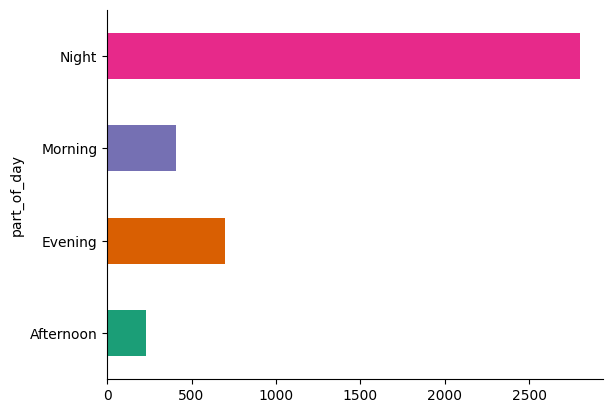

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('part_of_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

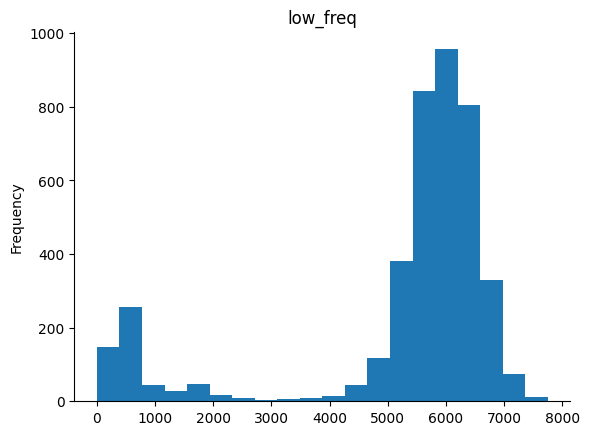

In [40]:
from matplotlib import pyplot as plt
df1['low_freq'].plot(kind='hist', bins=20, title='low_freq')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


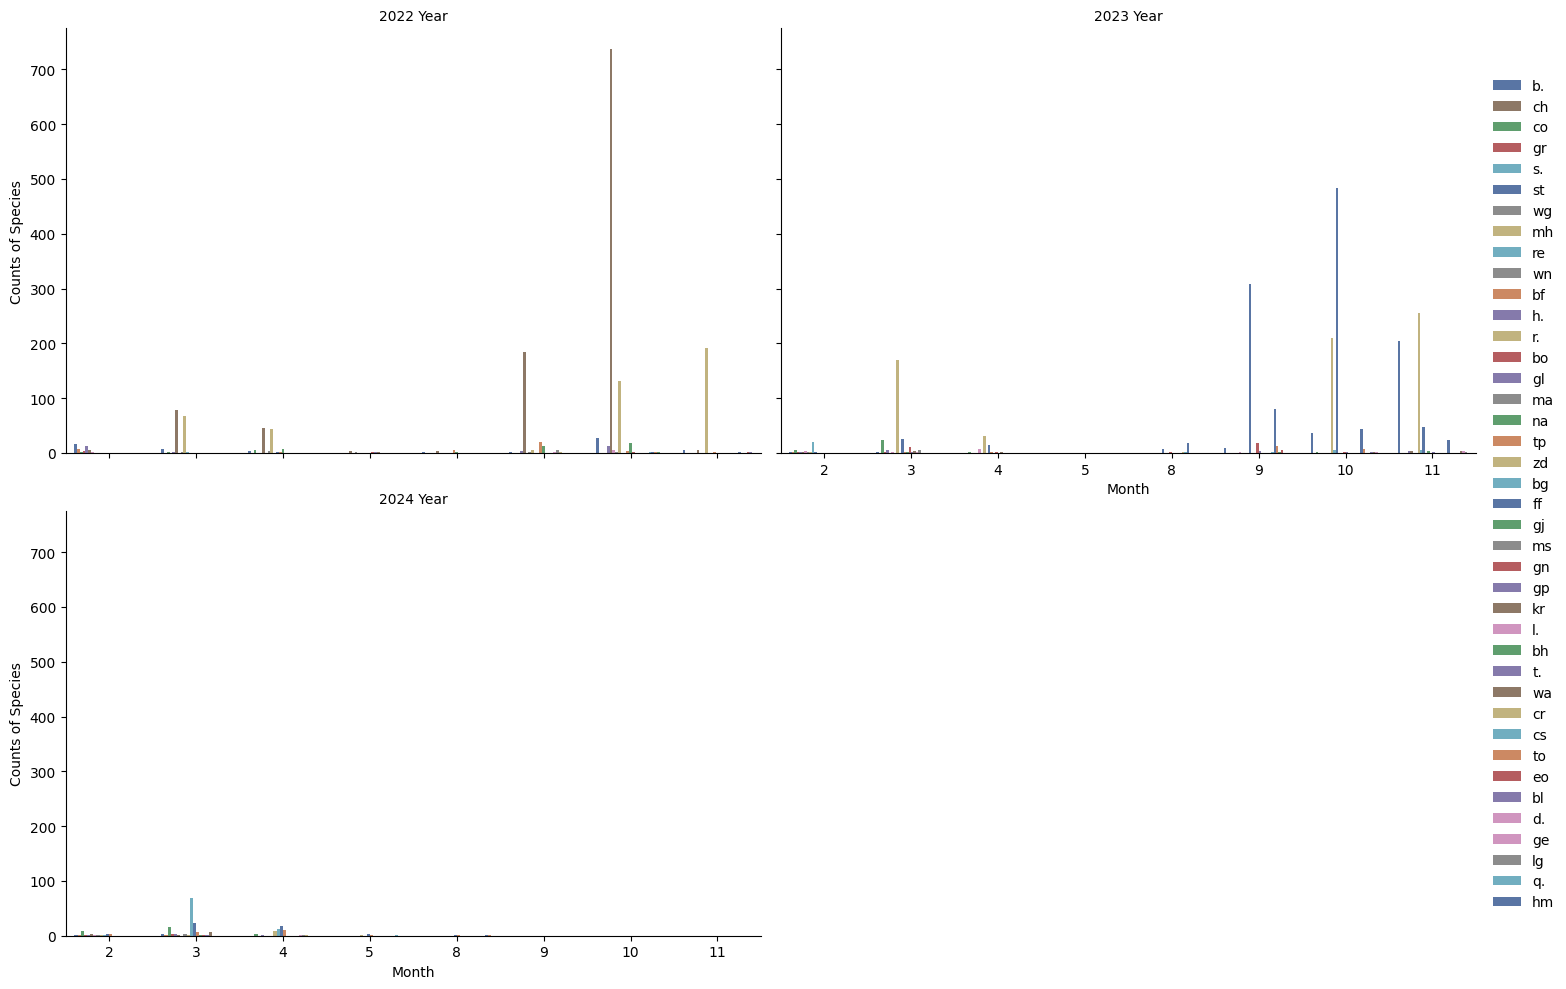

In [37]:
# Step 1: Group by 'year', 'month', and 'species' to count the occurrences
species_monthly_counts = df1.groupby(['year', 'month', 'species']).size().reset_index(name='counts')

# Step 2: Create a FacetGrid to show plots by year, divided into months
g = sns.FacetGrid(species_monthly_counts, col='year', col_wrap=2, height=5, aspect=1.5)

# Step 3: Map the barplot onto the FacetGrid
g.map(sns.barplot, 'month', 'counts', 'species', palette='deep')

# Step 4: Add titles and labels
g.set_axis_labels("Month", "Counts of Species")
g.set_titles("{col_name} Year")
g.add_legend()

# Step 5: Display the plot
plt.show()


In [38]:
import pandas as pd

# Step 1: Group by 'year', 'month', and 'species' to count the occurrences
species_monthly_counts = df1.groupby(['year', 'month', 'species']).size().reset_index(name='counts')

# Step 2: Create a pivot table to summarize the data
summary_table = species_monthly_counts.pivot_table(
    index=['year', 'month'],
    columns='species',
    values='counts',
    fill_value=0  # Fill NaN values with 0 for species not detected
)

# Step 3: Reset the index to make it a regular DataFrame
summary_table.reset_index(inplace=True)

# Display the summary table
print(summary_table)


species  year  month     b.   bf   bg   bh   bl   bo   ch    co  ...     re  \
0        2022      2   17.0  0.0  0.0  0.0  0.0  0.0  8.0   1.0  ...    0.0   
1        2022      3    7.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  ...   68.0   
2        2022      4    4.0  1.0  0.0  0.0  0.0  0.0  0.0   6.0  ...   44.0   
3        2022      5    0.0  0.0  0.0  0.0  0.0  2.0  0.0   0.0  ...    0.0   
4        2022      8    2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
5        2022      9    2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    6.0   
6        2022     10   28.0  0.0  1.0  0.0  0.0  1.0  0.0   0.0  ...  132.0   
7        2022     11    6.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  192.0   
8        2023      2    1.0  2.0  0.0  0.0  0.0  0.0  0.0   6.0  ...    2.0   
9        2023      3    2.0  0.0  0.0  2.0  0.0  0.0  0.0  23.0  ...  170.0   
10       2023      4    0.0  0.0  0.0  1.0  0.0  0.0  0.0   2.0  ...   30.0   
11       2023      8    0.0  0.0  0.0  0.0  0.0  0.0

In [39]:
# Step 1: Group by 'year', 'month', and 'species' to count the occurrences
species_monthly_counts = df1.groupby(['year', 'month', 'species']).size().reset_index(name='counts')

# Step 2: Create a pivot table with species as index and months as columns
summary_table = species_monthly_counts.pivot_table(
    index='species',  # Species names will be the index
    columns='month',  # Months will be the columns
    values='counts',  # Fill the table with counts
    fill_value=0  # Fill NaN values with 0 for species not detected
)

# Step 3: Reset the index to make it a regular DataFrame
summary_table.reset_index(inplace=True)

# Display the summary table
print(summary_table)

month species          2           3          4    5     8      9     10  \
0          b.   6.333333    4.000000   4.000000  0.0   2.0    5.5   32.0   
1          bf   1.500000    1.000000   1.000000  0.0   0.0    0.0    0.0   
2          bg   0.000000    0.000000   0.000000  0.0   0.0    0.0    1.0   
3          bh   0.000000    1.500000   1.000000  0.0   0.0    0.0    0.0   
4          bl   0.000000    0.000000   0.000000  0.0   0.0    0.0    1.0   
5          bo   0.000000    0.000000   0.000000  2.0   0.0    0.0    1.0   
6          ch   8.000000    0.000000   0.000000  0.0   0.0    0.0    2.0   
7          co   5.000000   13.333333   3.666667  0.0   0.0    0.0    1.0   
8          cr   0.000000    0.000000   0.000000  0.0   1.0    0.0    0.0   
9          cs   0.000000    0.000000   0.000000  0.0   2.0    1.0    0.0   
10         d.   0.000000    0.000000   0.000000  0.0   0.0    0.0    1.0   
11         eo   2.000000    4.000000   0.000000  0.0   0.0   12.0    8.0   
12         f

In [40]:
df_2022 = df1[df1['year'] == 2022][["Species Name English",	"Species Name Deutsch"	, 'month']]
df_2023 = df1[df1['year'] == 2023][["Species Name English",	"Species Name Deutsch", 'month']]
df_2024 = df1[df1['year'] == 2024][["Species Name English",	"Species Name Deutsch", 'month']]

df_2022.reset_index(drop=True, inplace=True)
df_2023.reset_index(drop=True, inplace=True)
df_2024.reset_index(drop=True, inplace=True)

print("Data for 2022:")
print(df_2022)

print("\nData for 2023:")
print(df_2023)

print("\nData for 2024:")
print(df_2023)

Data for 2022:
       Species Name English Species Name Deutsch  month
0              'Blackbird',              'Amsel'      2
1              'Blackbird',              'Amsel'      2
2              'Blackbird',              'Amsel'      2
3              'Blackbird',              'Amsel'      2
4              'Blackbird',              'Amsel'      2
...                     ...                  ...    ...
1725  White-fronted Goose',          'Blässgans'     10
1726  White-fronted Goose',          'Blässgans'     10
1727  White-fronted Goose',          'Blässgans'     10
1728              'Wigeon',          'Pfeifente'      3
1729       Little Bittern',        'Zwergdommel'      9

[1730 rows x 3 columns]

Data for 2023:
     Species Name English Species Name Deutsch  month
0            'Blackbird',              'Amsel'      2
1            'Blackbird',              'Amsel'      3
2            'Blackbird',              'Amsel'      3
3            'Blackbird',              'Amsel'      9
4 

In [41]:
df1['year'].unique()

array([2022, 2023, 2024], dtype=int32)

In [42]:

summary_2022 = df1[df1['year'] == 2022].groupby(['month', 'Species Name English']).size().reset_index(name='count')
summary_2023 = df1[df1['year'] == 2023].groupby(['month', 'Species Name English']).size().reset_index(name='count')
summary_2024 = df1[df1['year'] == 2024].groupby(['month', 'Species Name English']).size().reset_index(name='count')

summary_2022.reset_index(drop=True, inplace=True)
summary_2023.reset_index(drop=True, inplace=True)

print("Summary for 2022:")
print(summary_2022)

print("\nSummary for 2023:")
print(summary_2023)


print("\nSummary for 2024:")
print(summary_2024)


Summary for 2022:
    month Species Name English  count
0       2         'Blackbird',     17
1       2         'Chaffinch',      8
2       2              'Coot',      1
3       2        'Greenfinch',      4
4       2           'Skylark',     12
..    ...                  ...    ...
56     11         'Goldeneye',      1
57     11           'Redwing',    192
58     11      Golden Plover',      1
59     11         Grey Heron',      1
60     11        Song Thrush',      5

[61 rows x 3 columns]

Summary for 2023:
    month   Species Name English  count
0       2           'Blackbird',      1
1       2           'Bullfinch',      2
2       2                'Coot',      6
3       2           'Goldeneye',      2
4       2             'Lapwing',      1
..    ...                    ...    ...
66     11         Common Crane',      4
67     11        Greylag Goose',      3
68     11          Song Thrush',     47
69     11            Tawny Owl',     24
70     11  White-fronted Goose',      1

[71

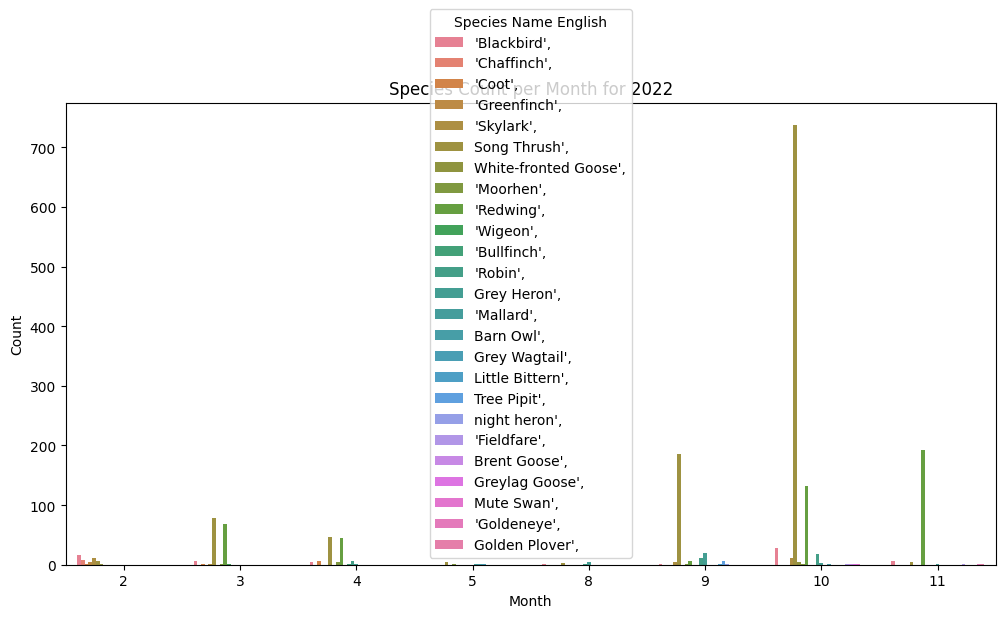

In [43]:

plt.figure(figsize=(12, 6))
sns.barplot(data=summary_2022, x='month', y='count', hue='Species Name English')
plt.title('Species Count per Month for 2022')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Species Name English')
plt.show()

In [44]:
pivot_table = summary_2022.pivot_table(values='count', index='month', columns='year', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Species Count Heatmap by Month and Year')
plt.show()

KeyError: 'year'

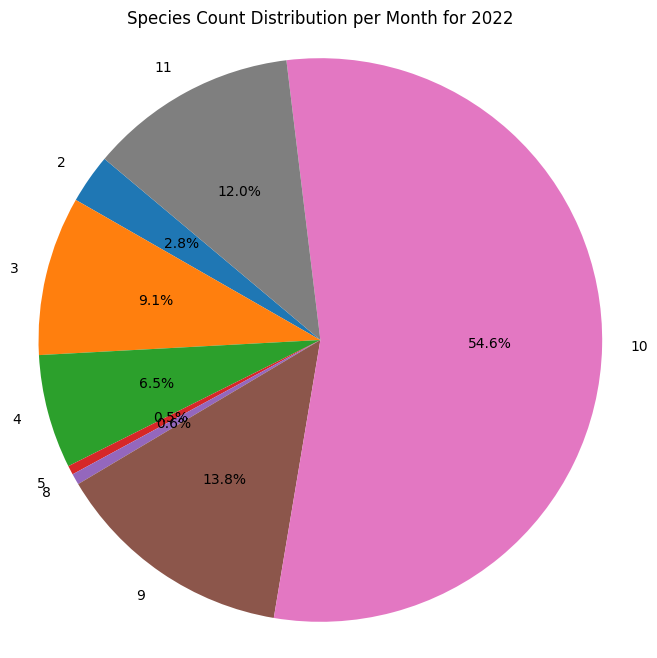

In [45]:

# Group data by month and sum counts
month_summary = summary_2022.groupby('month')['count'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_summary, labels=month_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Species Count Distribution per Month for 2022')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

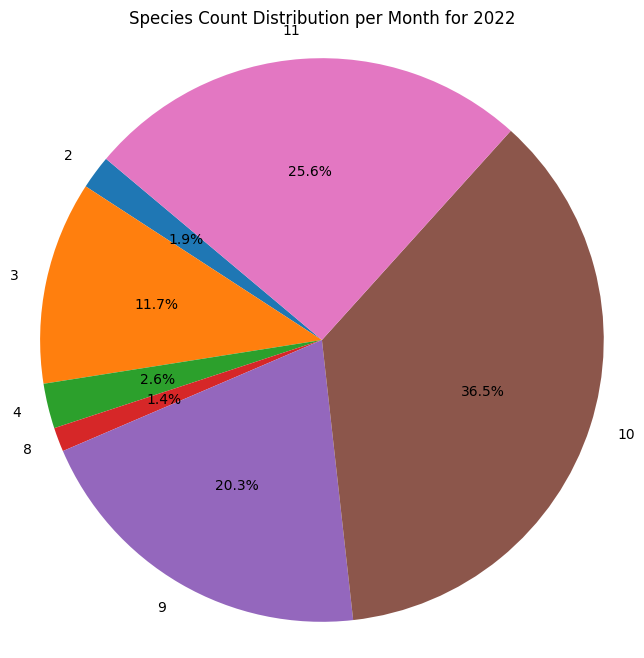

In [46]:

month_summary = summary_2023.groupby('month')['count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(month_summary, labels=month_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Species Count Distribution per Month for 2022')
plt.axis('equal')
plt.show()

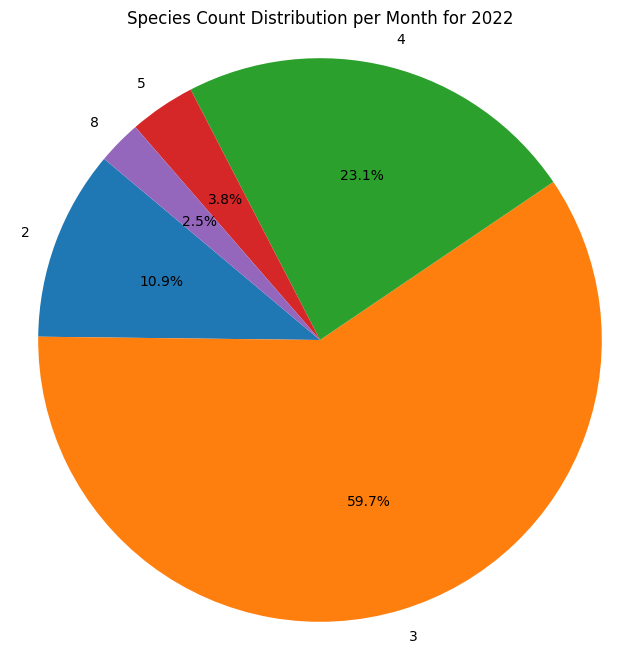

In [47]:
month_summary = summary_2024.groupby('month')['count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(month_summary, labels=month_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Species Count Distribution per Month for 2022')
plt.axis('equal') .
plt.show()

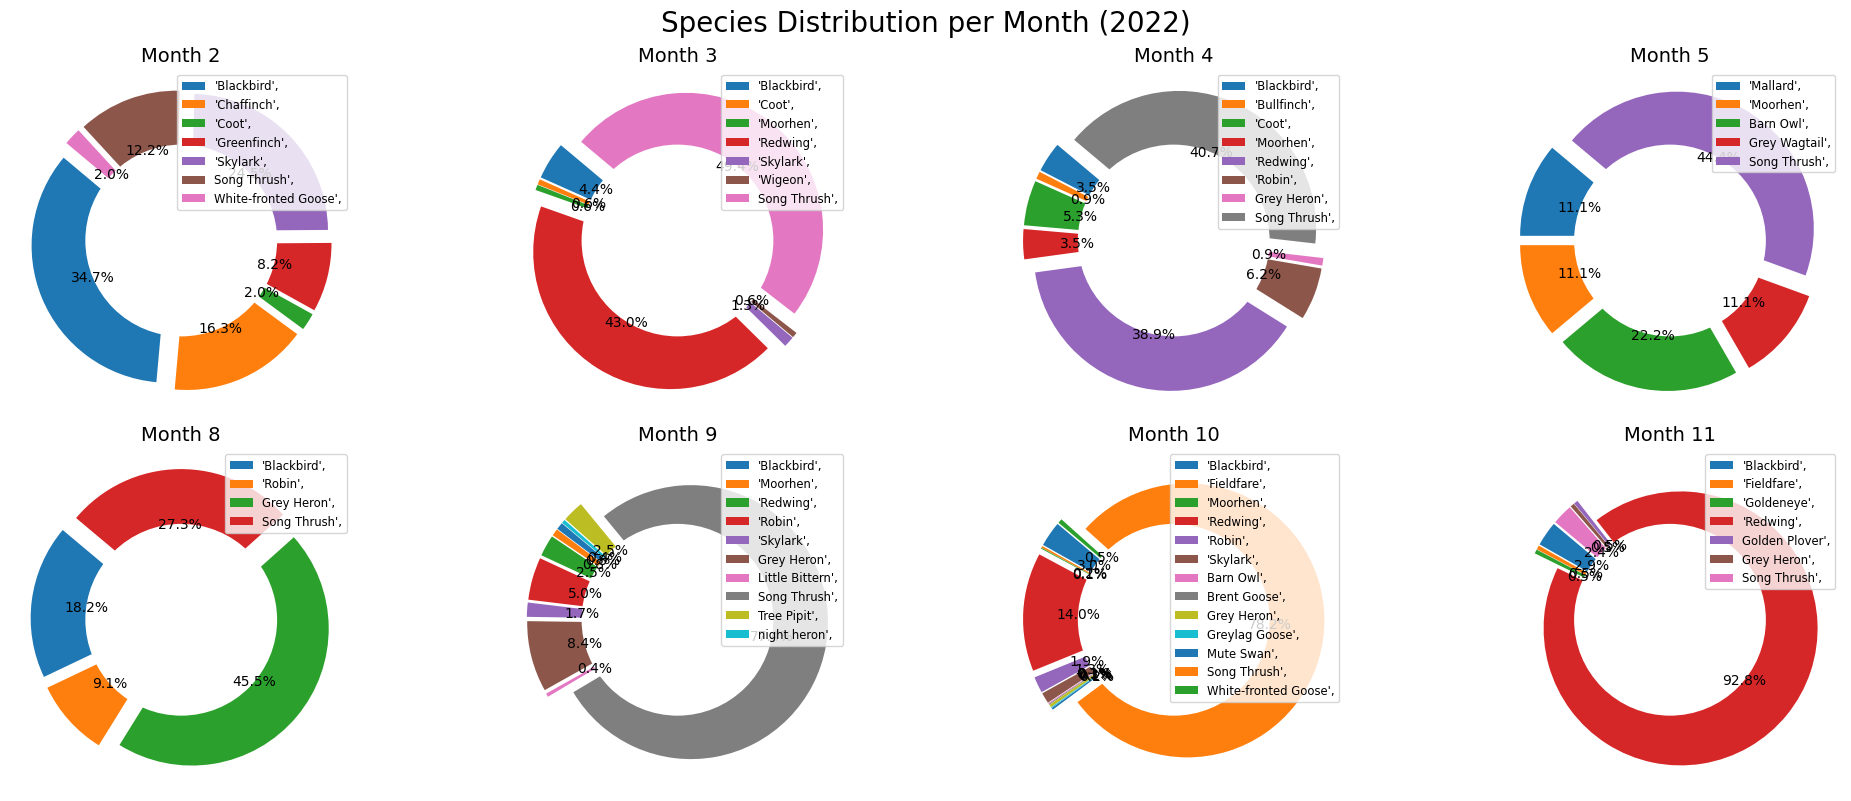

In [48]:
import matplotlib.pyplot as plt
month_summary = summary_2022.groupby('month')['count'].sum().reset_index()

plt.figure(figsize=(20, 12))

for i, month in enumerate(month_summary['month']):
    plt.subplot(3, 4, i + 1)
    species_data = summary_2022[summary_2022['month'] == month]

    explode = [0.1] * len(
    plt.pie(species_data['count'],
           autopct='%1.1f%%',
           startangle=140,
           explode=explode)
    plt.legend(species_data['Species Name English'], loc='upper right', fontsize='small')


    plt.title(f'Month {month}', fontsize=14)

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.suptitle('Species Distribution per Month (2022)', fontsize=20)
plt.subplots_adjust(top=0.93)
plt.show()


In [49]:
df1

,filename,species,Species Name English,Species Name Deutsch,loc,low_freq,high_freq,start,end,year,month,day,hour,part_of_day,time
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,6589,9171,10,10.9,2022,2,15,16,Afternoon,1900-01-01 16:37:22.540790
1,2459627.200193_Tautenburg___5660-8965kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5660,8965,10,11.3,2022,2,16,16,Afternoon,1900-01-01 16:48:16.675202
2,2459627.201466_Tautenburg___5907-8964kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5907,8964,10,11.0,2022,2,16,16,Afternoon,1900-01-01 16:50:06.662414
3,2459627.746915_Tautenburg___5763-9192kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,5763,9192,10,11.0,2022,2,17,5,Morning,1900-01-01 05:55:33.456002
4,2459627.747022_Tautenburg___6134-8798kHz___10-...,b.,"'Blackbird',",'Amsel',Tautenburg,6134,8798,10,11.0,2022,2,17,5,Morning,1900-01-01 05:55:42.700812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,2460009.507276_Tautenburg___846-3745kHz___10-1...,wn,"'Wigeon',",'Pfeifente',Tautenburg,846,3745,10,15.9,2023,3,6,0,Night,1900-01-01 00:10:28.646398
4134,2460028.355035_Tautenburg___402-4530kHz___10-1...,wn,"'Wigeon',",'Pfeifente',Tautenburg,402,4530,10,18.3,2023,3,24,20,Evening,1900-01-01 20:31:15.024001
4135,2460029.585977_Tautenburg___524-5759kHz___10-2...,wn,"'Wigeon',",'Pfeifente',Tautenburg,524,5759,10,27.9,2023,3,26,2,Night,1900-01-01 02:03:48.412815
4136,2460031.483458_Tautenburg___1148-4470kHz___10-...,wn,"'Wigeon',",'Pfeifente',Tautenburg,1148,4470,10,22.3,2023,3,27,23,Night,1900-01-01 23:36:10.771180


In [50]:
df9 = df1.copy()

In [51]:
df9.drop(columns = ["time", "loc", "Species Name Deutsch", "Species Name English"], inplace = True)

In [85]:
df9["time"] =  df9["end"] - df9["start"]

In [87]:
df9.drop(columns = ["start", "end"] , inplace  = True )

In [88]:
df9.head(5)

,filename,species,low_freq,high_freq,month,day,hour,year_2022,year_2023,year_2024,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,time
0,2459626.192622_Tautenburg___6589-9171kHz___10-...,0,6589,9171,2,15,16,1,0,0,1,0,0,0,0.9
1,2459627.200193_Tautenburg___5660-8965kHz___10-...,0,5660,8965,2,16,16,1,0,0,1,0,0,0,1.3
2,2459627.201466_Tautenburg___5907-8964kHz___10-...,0,5907,8964,2,16,16,1,0,0,1,0,0,0,1.0
3,2459627.746915_Tautenburg___5763-9192kHz___10-...,0,5763,9192,2,17,5,1,0,0,0,0,1,0,1.0
4,2459627.747022_Tautenburg___6134-8798kHz___10-...,0,6134,8798,2,17,5,1,0,0,0,0,1,0,1.0


In [53]:
df9 = pd.get_dummies(df9, columns=["year", "part_of_day"], dtype=int)


In [62]:
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [64]:
df9["species"] = label_encoder.fit_transform(df9["species"])

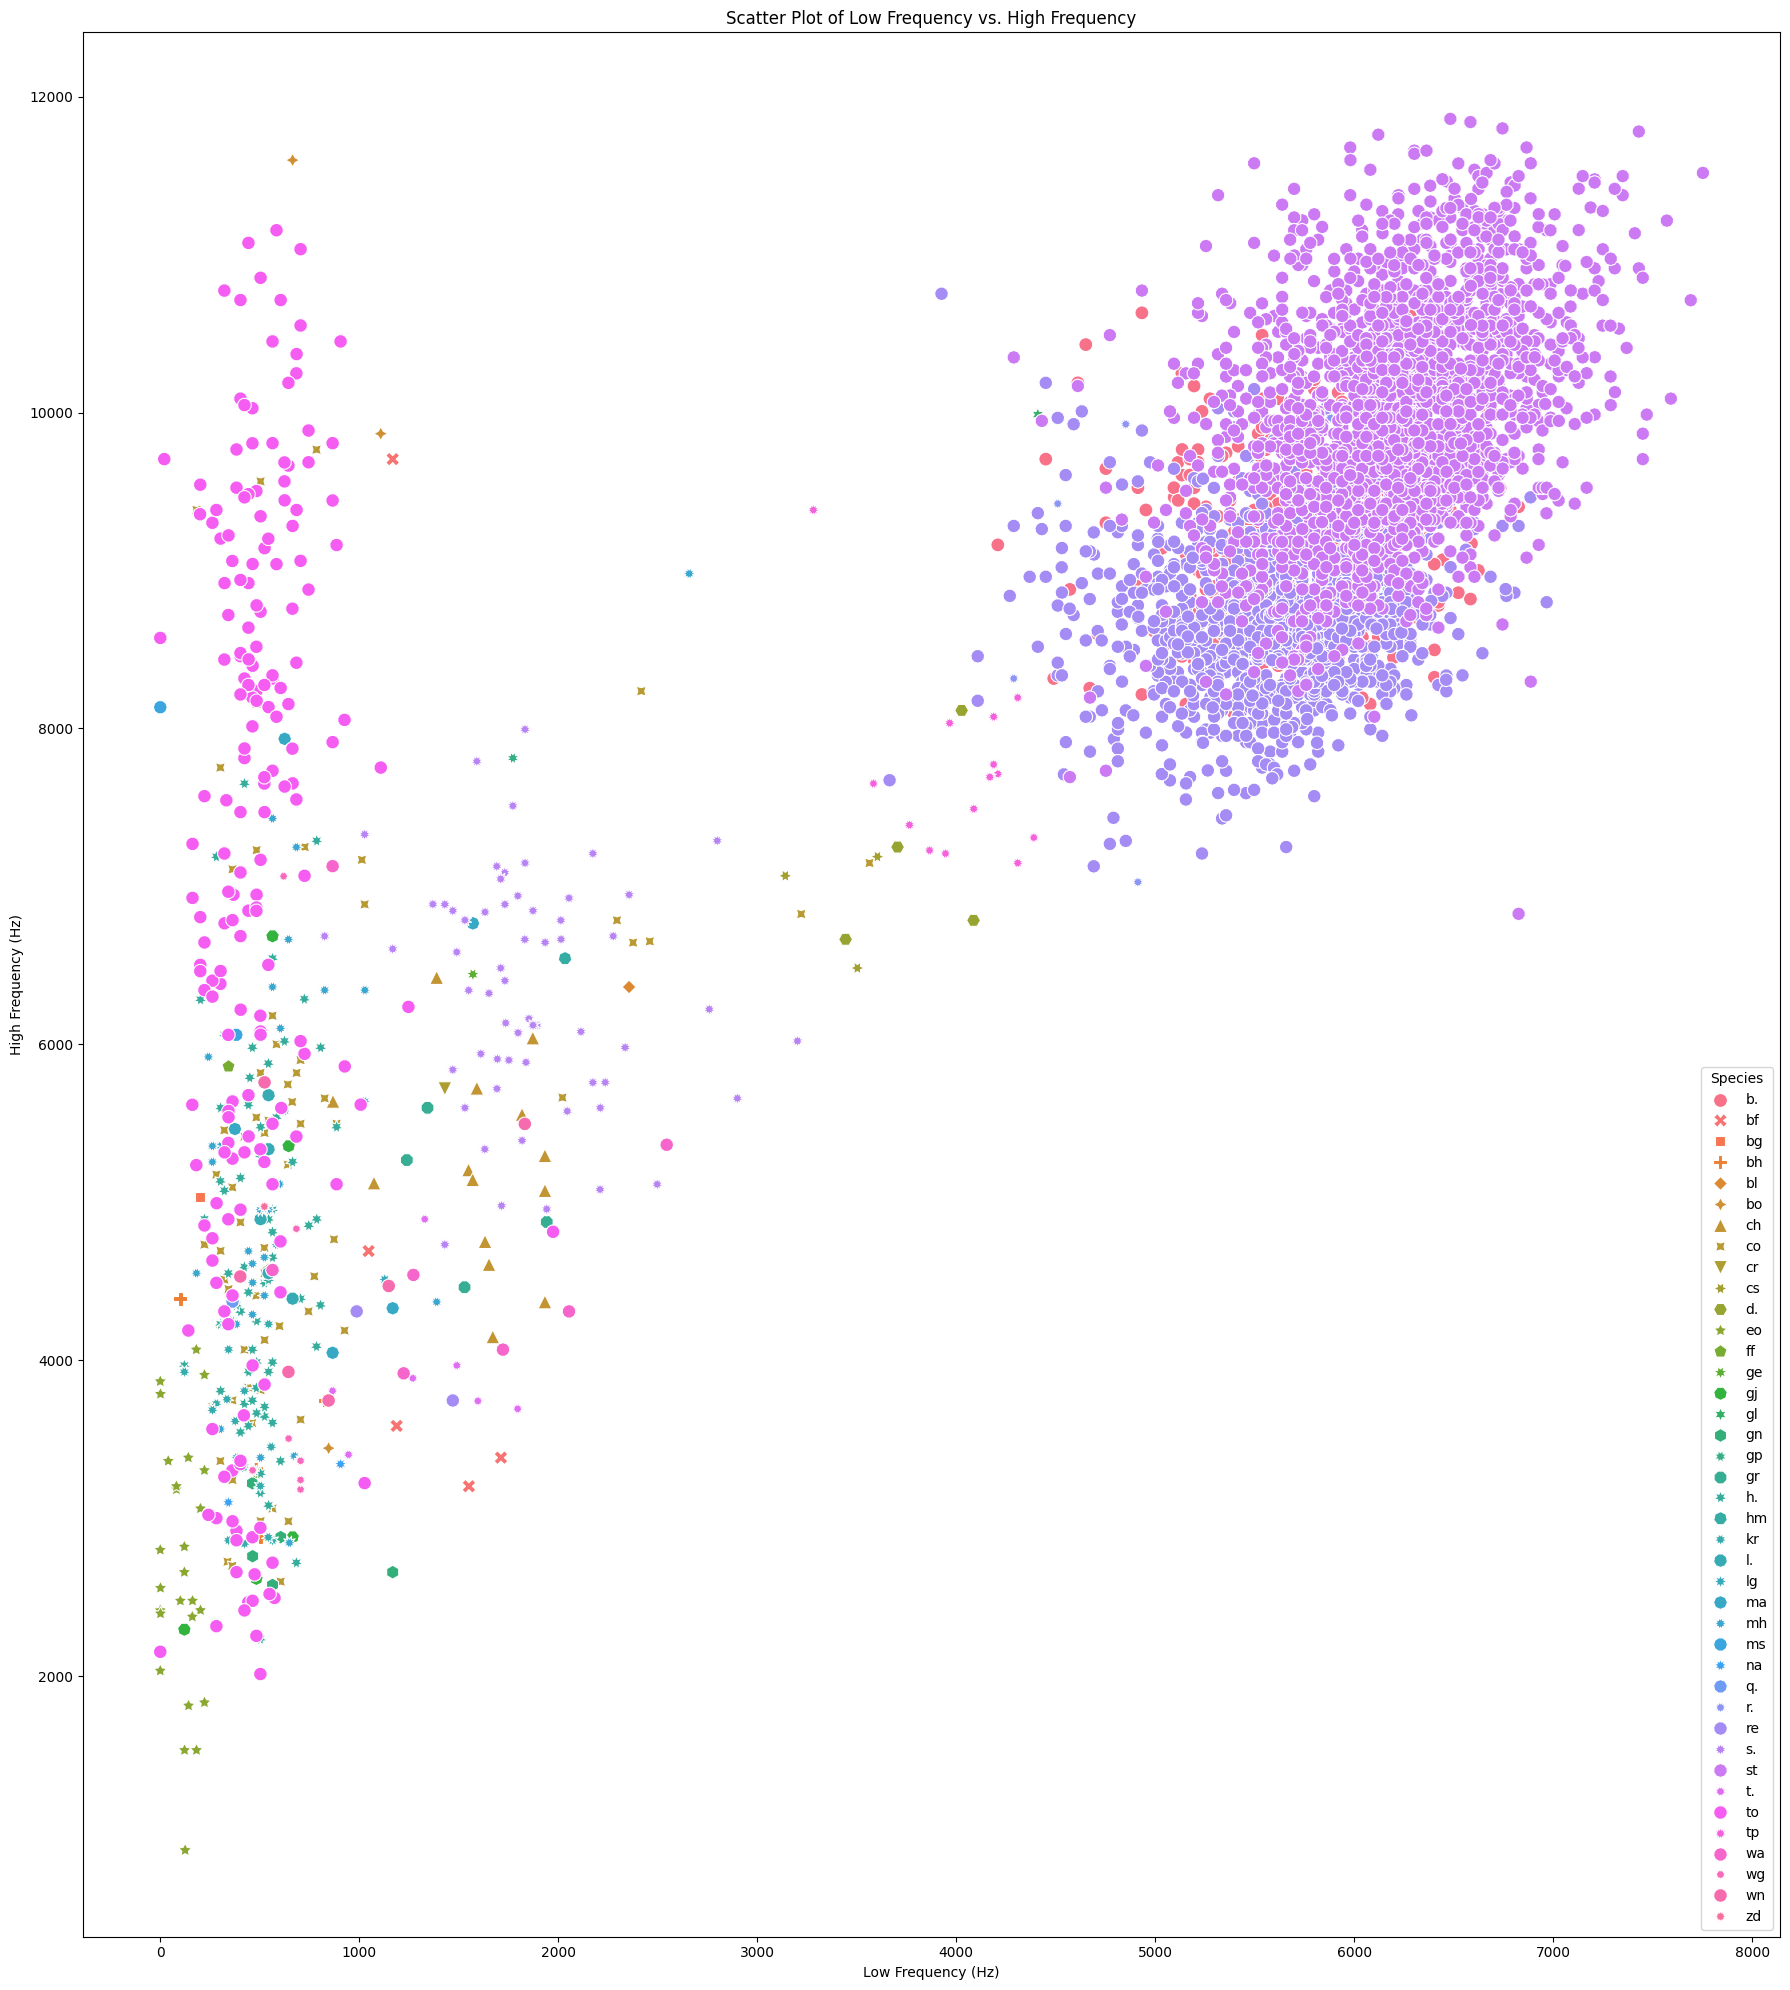

In [59]:
plt.figure(figsize=(18, 20))
sns.scatterplot(data=df9, x='low_freq', y='high_freq', hue='species', style='species', s=100)

plt.title('Scatter Plot of Low Frequency vs. High Frequency')
plt.xlabel('Low Frequency (Hz)')
plt.ylabel('High Frequency (Hz)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

In [91]:
X_train,X_test,y_train,y_test = train_test_split(df9.drop(columns = ["species", "filename"]) , df["species"], test_size = 0.2, random_state = 42)

In [92]:
y_test.nunique()

25

In [93]:
transformer = ColumnTransformer(
    transformers = [
        ("standard_scaler",StandardScaler(),["low_freq", 	"high_freq"]),
        ('minmax_scaler', MinMaxScaler(), ['time','month', 'day','hour']),

    ], remainder = "passthrough"
)

In [94]:
transformer.fit_transform(X_train).shape

(3310, 13)

In [95]:
transformer.transform(X_test).shape

(828, 13)

,low_freq,high_freq,start,end,month,day,hour,year_2022,year_2023,year_2024,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night
2372,6423,10812,10,10.8,10,9,1,1,0,0,0,0,0,1
2398,6423,9383,10,11.0,10,9,19,1,0,0,0,1,0,0
3182,6020,9382,10,11.3,9,25,4,0,1,0,0,0,0,1
173,6484,9705,10,11.9,11,8,5,0,1,0,0,0,1,0
3142,6061,10370,10,11.2,9,25,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,5860,8779,10,11.7,10,8,23,0,1,0,0,0,0,1
466,1772,7812,10,17.2,11,14,1,1,0,0,0,0,0,1
3092,6443,10128,10,11.4,9,19,3,0,1,0,0,0,0,1
3772,6141,9705,10,11.1,10,26,5,0,1,0,0,0,1,0


In [96]:
transformed_columns = ["low_freq", "high_freq", "time", "month", "day", "hour","year_2022","year_2023","year_2024","part_of_day_Afternoon","part_of_day_Evening","part_of_day_Morning","part_of_day_Night" ]


X_train_transformed_df = pd.DataFrame(transformer.fit_transform(X_train), columns=transformed_columns)

X_test_transformed_df = pd.DataFrame(transformer.transform(X_test), columns=transformed_columns)

print(X_train_transformed_df.head())

   low_freq  high_freq      time     month       day      hour  year_2022  \
0  0.626563   1.065412  0.000894  0.888889  0.266667  0.043478        1.0   
1  0.626563   0.233996  0.001341  0.888889  0.266667  0.826087        1.0   
2  0.409922   0.233415  0.002012  0.777778  0.800000  0.173913        0.0   
3  0.659354   0.421341  0.003353  1.000000  0.233333  0.217391        0.0   
4  0.431963   0.808249  0.001789  0.777778  0.800000  0.043478        0.0   

   year_2023  year_2024  part_of_day_Afternoon  part_of_day_Evening  \
0        0.0        0.0                    0.0                  0.0   
1        0.0        0.0                    0.0                  1.0   
2        1.0        0.0                    0.0                  0.0   
3        1.0        0.0                    0.0                  0.0   
4        1.0        0.0                    0.0                  0.0   

   part_of_day_Morning  part_of_day_Night  
0                  0.0                1.0  
1                  0.0

In [97]:
X_train_transformed_df

,low_freq,high_freq,time,month,day,hour,year_2022,year_2023,year_2024,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night
0,0.626563,1.065412,0.000894,0.888889,0.266667,0.043478,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.626563,0.233996,0.001341,0.888889,0.266667,0.826087,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.409922,0.233415,0.002012,0.777778,0.800000,0.173913,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.659354,0.421341,0.003353,1.000000,0.233333,0.217391,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.431963,0.808249,0.001789,0.777778,0.800000,0.043478,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,0.323912,-0.117421,0.002906,0.888889,0.233333,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3306,-1.873669,-0.680038,0.015202,1.000000,0.433333,0.043478,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3307,0.637314,0.667450,0.002236,0.777778,0.600000,0.130435,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3308,0.474968,0.421341,0.001565,0.888889,0.833333,0.217391,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [98]:
X_test_transformed_df

,low_freq,high_freq,time,month,day,hour,year_2022,year_2023,year_2024,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night
0,0.583020,0.760540,0.003353,0.888889,0.666667,0.217391,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.745903,0.316032,0.000671,0.888889,0.333333,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.615811,0.620323,0.002459,0.777778,0.900000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.139526,0.421341,0.012967,1.000000,0.533333,0.260870,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.323912,0.023379,0.007154,0.888889,0.533333,0.173913,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.702360,0.737850,0.002012,0.111111,0.600000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
824,-0.130871,0.046651,0.003353,0.111111,0.966667,0.086957,0.0,1.0,0.0,0.0,0.0,0.0,1.0
825,-2.501549,-2.460397,0.348983,0.777778,0.966667,0.869565,0.0,1.0,0.0,0.0,1.0,0.0,0.0
826,0.355628,0.491159,0.001565,0.777778,0.766667,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,1.0
